(5000, 400)
(5000,)
(5000, 400)


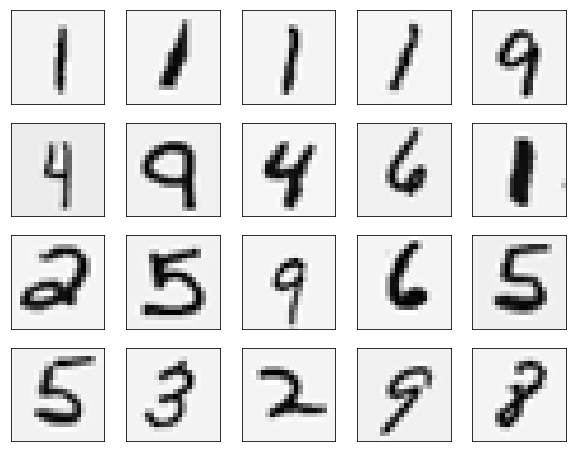

In [7]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10000)

datapath = 'ex4data1.mat'
data = scipy.io.loadmat(datapath)
X = data['X']
y = data['y'].ravel()
print(X.shape)
print(y.shape)


ids = np.random.permutation(range(X.shape[0]))
X_train = X[ids]

print(X_train.shape)


fig = plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.grid('off')
    plt.imshow(X_train[i].reshape(20, 20).T, cmap=plt.cm.gray_r)
#     plt.xlabel(np.argmax(y_train[i]) + 1)

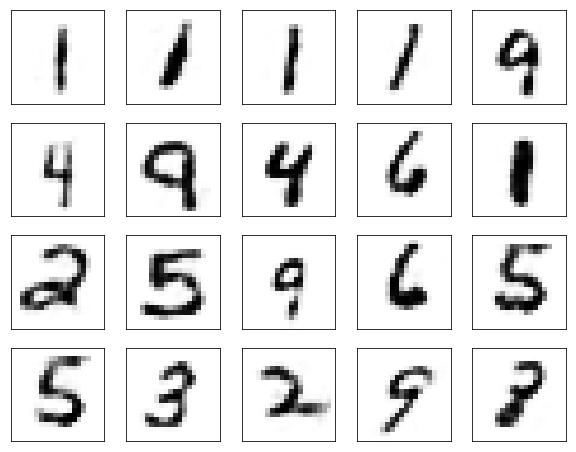

In [28]:

fig = plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.grid('off')
    plt.imshow(a2[i].reshape(20, 20).T, cmap=plt.cm.gray_r)
#     plt.xlabel(np.argmax(y_train[i]) + 1)

In [8]:
# def h(theta, x):
#     return 1 / (1+np.exp(-np.dot(x, theta)))
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def grad_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))
    
def feedfw(theta1, theta2, x):
    x = addones(x) #4500x401
    z1 = np.dot(x, theta1.T) #4500x25
#     print(z1.shape)
    a1 = sigmoid(z1)
    a1 = addones(a1) #4500x26
    z2 = np.dot(a1, theta2.T) #4500x10
#     print(z2.shape)
    a2 = sigmoid(z2)
#     print(a2.shape)
    return a2

def cost(y_pred, y_target, num_train):
    return np.sum(-y_target*np.log(y_pred)-(1-y_target)*np.log(1-y_pred)) / num_train

def cost_regu(y_pred, y_target, theta1, theta2, ld, num_train):
    return np.sum(-y_target*np.log(y_pred)-(1-y_target)*np.log(1-y_pred)) / num_train + ld * \
            (np.sum(theta1**2)+np.sum(theta2**2)-np.sum(theta1[:,0]**2)-np.sum(theta2[:,0]**2)) / (2*num_train)

In [24]:
lr = .3
ite = 10000

In [25]:
num_feature = X_train.shape[1]
num_hidden = 50
w1 = np.random.randn(num_feature, num_hidden) / np.sqrt(num_feature)
b1 = np.zeros((1, num_hidden))
w2 = np.random.randn(num_hidden, num_feature) / np.sqrt(num_hidden)
b2 = np.zeros((1, num_feature))
num_train = X_train.shape[0]


In [26]:
for it in range(ite):
    #feed forward
    z1 = np.dot(X_train, w1) + b1 #4500x25
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2 #4500x10
    a2 = sigmoid(z2)
    
    #lost
    lost = cost(a2, X_train, num_train)
    if it%(ite/10) == 0:
        print('Ite {0} Lost {1}'.format(it, lost))
        
    #backprop
    dz2 = (a2 - X_train) / num_train #4500x10
    dw2 = np.dot(a1.T, dz2) #25x10
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, w2.T) #4500x25
#     print(a1[0])
#     dz1 = da1 * (a1*(1-a1))
    dz1 = da1 * grad_sigmoid(z1)
    dw1 = np.dot(X_train.T, dz1) #400x25
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
#     dw1 /= num_train
#     dw2 /= num_train
#     db1 /= num_train
#     db2 /= num_train
    
    #update
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2

Ite 0 Lost 296.1897648382626
Ite 1000 Lost 49.29835773497904
Ite 2000 Lost 46.141138825022814
Ite 3000 Lost 43.681196561597616
Ite 4000 Lost 43.85060461801715
Ite 5000 Lost 42.418204574183086
Ite 6000 Lost 43.8642269638296
Ite 7000 Lost 41.30037633194677
Ite 8000 Lost 41.05647641529458
Ite 9000 Lost 40.23803942411624


In [27]:
z1 = np.dot(X_train, w1) + b1 #4500x25
a1 = sigmoid(z1)
z2 = np.dot(a1, w2) + b2 #4500x10
a2 = sigmoid(z2)
print(a2.shape)

(5000, 400)
